# Аналіз набору даних за допомогою Pandas, NumPy, візуалізації даних за допомогою Matplotlib у блокноті Jupyter.

**Задачі 15 балів**

Students Exam Scores: Extended Dataset | Kaggle  
https://www.kaggle.com/datasets/desalegngeb/students-exam-scores

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

In [2]:
scores = pd.read_csv("./datasets/Expanded_data_with_more_features.csv")
scores = scores.dropna()
scores.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
5,5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79
6,6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5 - 10,85,93,89
7,7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39


## Проаналізуйте розподіл за статтю серед учнів.

1. Скільки студентів і студенток у наборі даних?

Студентів: 9468
Студенток: 9775


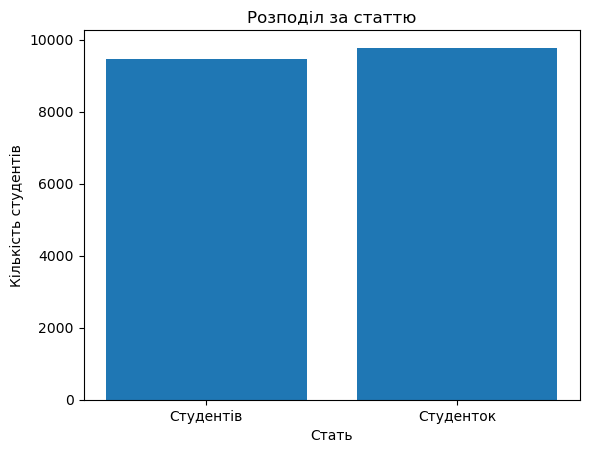

In [3]:
counts_genders = scores['Gender'].value_counts()
print("Студентів:", counts_genders['male'])
print("Студенток:", counts_genders['female'])

plt.bar(["Студентів", "Студенток"], [counts_genders['male'], counts_genders['female']])
plt.xlabel("Стать")
plt.ylabel("Кількість студентів")
plt.title("Розподіл за статтю")
plt.show()

2. Який відсоток студентів чоловічої статі в наборі даних?

In [4]:
percentage_male = (counts_genders['male'] / len(scores)) * 100
percentage_male

49.202307332536506

3. Який відсоток студенток у наборі даних?

In [5]:
percentage_female = (counts_genders['female'] / len(scores)) * 100
percentage_female

50.79769266746349

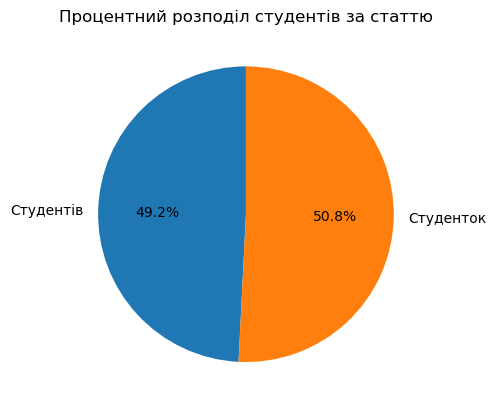

In [6]:
data = [percentage_male, percentage_female]
label = ['Студентів', 'Студенток']
 
plt.pie(data, labels=label, autopct='%1.1f%%', startangle=90)
plt.title('Процентний розподіл студентів за статтю')
plt.show()

## Дослідіть зв’язок між етнічною групою та результатами тестів.

4. Яка етнічна група має найвищий середній бал з математики?

In [7]:
best_group_math = scores.groupby('EthnicGroup')['MathScore'].mean().idxmax()
best_group_math

'group E'

5. Яка етнічна група має найвищий середній бал читання?

In [8]:
best_group_reading = scores.groupby('EthnicGroup')['ReadingScore'].mean().idxmax()
best_group_reading

'group E'

6. Яка етнічна група має найвищий середній бал з письма?

In [9]:
best_group_writing = scores.groupby('EthnicGroup')['WritingScore'].mean().idxmax()
best_group_writing

'group E'

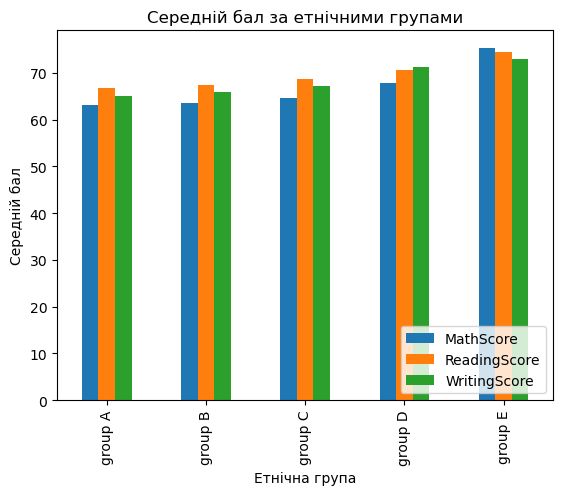

In [10]:
ethnic_group_mean_scores = scores[["EthnicGroup", "MathScore", "ReadingScore", "WritingScore"]].groupby("EthnicGroup").mean()

ethnic_group_mean_scores.plot(kind="bar", y=["MathScore", "ReadingScore", "WritingScore"])
plt.xlabel("Етнічна група")
plt.ylabel("Середній бал")
plt.title("Середній бал за етнічними групами")
plt.legend(loc="lower right")
plt.show()

## Дослідіть вплив курсу підготовки до тесту на результати тесту.

7. Який середній бал з математики для студентів, які закінчили курс підготовки до тесту?

In [11]:
prep_completed_math_avg = scores[scores['TestPrep'] == 'completed']['MathScore'].mean()
prep_completed_math_avg

69.64963942307692

8. Який середній бал з читання для студентів, які пройшли курс підготовки до тесту?

In [12]:
prep_completed_reading_avg = scores[scores['TestPrep'] == 'completed']['ReadingScore'].mean()
prep_completed_reading_avg

73.85982572115384

9. Який середній бал для студентів, які закінчили курс підготовки до тесту?

In [13]:
prep_completed_writing_avg = scores[scores['TestPrep'] == 'completed']['WritingScore'].mean()
prep_completed_writing_avg

74.86298076923077

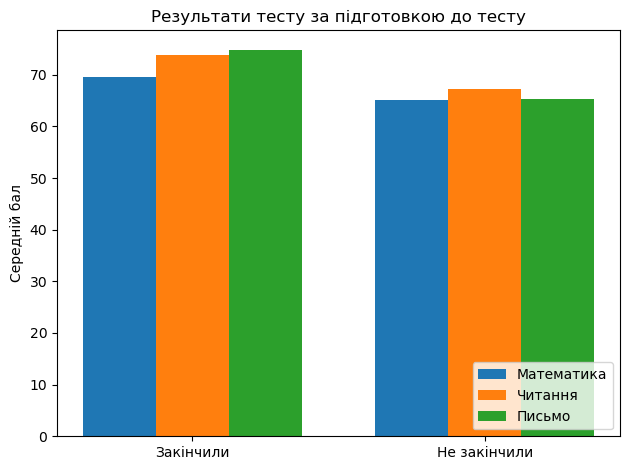

In [14]:
test_prep_labels = ["Закінчили", "Не закінчили"]
prep_none_avg = scores[scores["TestPrep"] == "none"]
math_scores = [prep_completed_math_avg, prep_none_avg['MathScore'].mean()]
reading_scores = [prep_completed_reading_avg, prep_none_avg['ReadingScore'].mean()]
writing_scores = [prep_completed_writing_avg, prep_none_avg['WritingScore'].mean()]

x = np.arange(len(test_prep_labels))
width = 0.25

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, math_scores, width, label="Математика")
rects2 = ax.bar(x, reading_scores, width, label="Читання")
rects3 = ax.bar(x + width, writing_scores, width, label="Письмо")

ax.set_ylabel("Середній бал")
ax.set_title("Результати тесту за підготовкою до тесту")
ax.set_xticks(x)
ax.set_xticklabels(test_prep_labels)
ax.legend(loc="lower right")

fig.tight_layout()
plt.show()

## Проаналізуйте розподіл батьків за сімейним станом серед учнів.

10. Скільки студентів мають одружених батьків?

In [15]:
count_married_parents = len(scores[scores['ParentMaritalStatus'] == 'married'])
count_married_parents

11009

11. Скільки студентів мають батьків-одинаків?

In [16]:
count_single_parents = len(scores[scores['ParentMaritalStatus'] == 'single'])
count_single_parents

4608

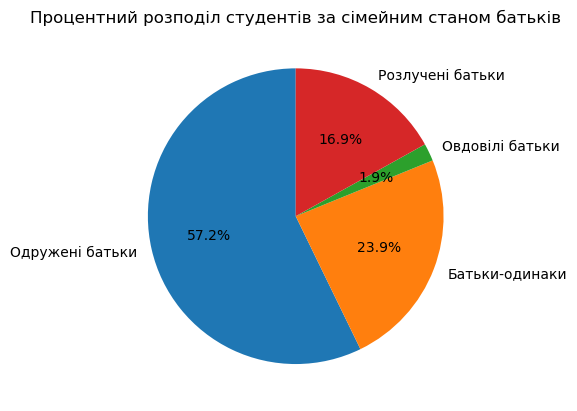

In [17]:
total = len(scores)
percentage_married_parents = len(scores[scores['ParentMaritalStatus'] == 'married'])/total
percentage_single_parents = len(scores[scores['ParentMaritalStatus'] == 'single'])/total
percentage_widowed_parents = len(scores[scores['ParentMaritalStatus'] == 'widowed'])/total
percentage_divorced_parents = len(scores[scores['ParentMaritalStatus'] == 'divorced'])/total

data = [percentage_married_parents, percentage_single_parents, percentage_widowed_parents, percentage_divorced_parents]
label = ['Одружені батьки', 'Батьки-одинаки', 'Овдовілі батьки', 'Розлучені батьки']
 
plt.pie(data, labels=label, autopct='%1.1f%%', startangle=90)
plt.title('Процентний розподіл студентів за сімейним станом батьків')
plt.show()

## Дослідіть зв’язок між заняттями спортом і результатами тестів.

12. Чи студенти, які регулярно займаються спортом, мають вищі середні результати з математики, ніж ті, хто ніколи не       займається спортом?

In [18]:
avg_math_scores = scores.groupby('PracticeSport')['MathScore'].mean()
avg_math_scores['regularly'] > avg_math_scores['never']

True

13. Чи студенти, які регулярно займаються спортом, мають вищі середні результати читання, ніж ті, хто ніколи не займається спортом?

In [19]:
avg_reading_scores = scores.groupby('PracticeSport')['ReadingScore'].mean()
avg_reading_scores['regularly'] > avg_reading_scores['never']

True

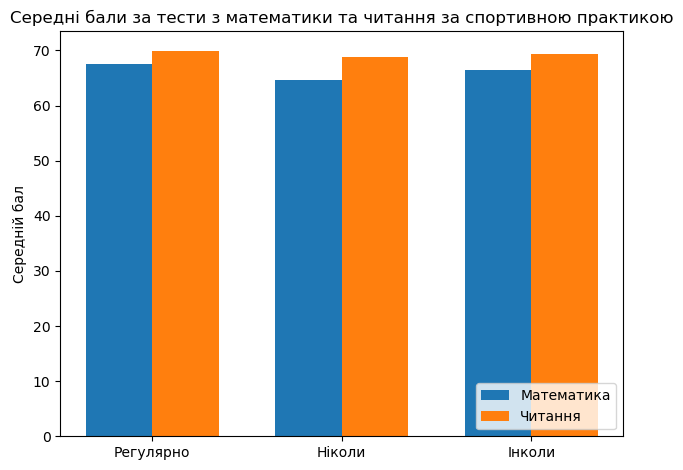

In [20]:
students_sports_regularly = scores[scores["PracticeSport"] == "regularly"]
students_sports_never = scores[scores["PracticeSport"] == "never"]
students_sports_sometimes = scores[scores["PracticeSport"] == "sometimes"]

avg_math_score_sports_regularly = students_sports_regularly["MathScore"].mean()
avg_math_score_sports_never = students_sports_never["MathScore"].mean()
avg_math_score_sports_sometimes = students_sports_sometimes["MathScore"].mean()

avg_reading_score_sports_regularly = students_sports_regularly["ReadingScore"].mean()
avg_reading_score_sports_never = students_sports_never["ReadingScore"].mean()
avg_reading_score_sports_sometimes = students_sports_sometimes["ReadingScore"].mean()


sports_labels = ["Регулярно", "Ніколи", "Інколи"]
math_scores = [avg_math_score_sports_regularly, avg_math_score_sports_never, avg_math_score_sports_sometimes]
reading_scores = [avg_reading_score_sports_regularly, avg_reading_score_sports_never, avg_reading_score_sports_sometimes]

x = np.arange(len(sports_labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, math_scores, width, label="Математика")
rects2 = ax.bar(x + width/2, reading_scores, width, label="Читання")

ax.set_ylabel("Середній бал")
ax.set_title("Середні бали за тести з математики та читання за спортивною практикою")
ax.set_xticks(x)
ax.set_xticklabels(sports_labels)
ax.legend(loc='lower right')

fig.tight_layout()
plt.show()

## Проаналізуйте розподіл транспортних засобів до школи серед учнів.

14. Скільки учнів користується шкільним автобусом, щоб дістатися до школи?

In [21]:
count_using_school_bus = len(scores[scores['TransportMeans'] == 'school_bus'])
count_using_school_bus

11280

15. Скільки учнів користується приватним транспортом, щоб дістатися до школи?

In [22]:
count_using_private_transport = len(scores[scores['TransportMeans'] == 'private'])
count_using_private_transport

7963

In [23]:
total

19243

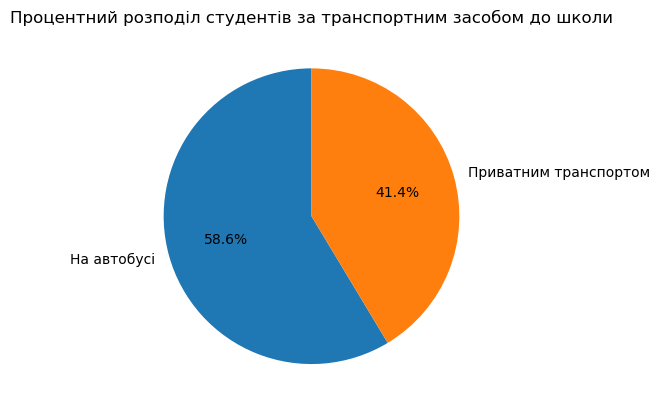

In [24]:
total = len(scores)
percentage_students_school_bus = len(scores[scores["TransportMeans"] == "school_bus"])/total
percentage_students_private_transport = len(scores[scores["TransportMeans"] == "private"])/total

data = [percentage_students_school_bus, percentage_students_private_transport]
label = ['На автобусі', 'Приватним транспортом']
 
plt.pie(data, labels=label, autopct='%1.1f%%', startangle=90)
plt.title('Процентний розподіл студентів за транспортним засобом до школи')
plt.show()

# Передбачте, чи завершив студент курс підготовки до іспиту, на основі його демографічних та академічних даних.

**Задача класифікації 5 балів**

* Вхідні дані: Gender, EthnicGroup, ParentEduc, LunchType, ParentMaritalStatus, PracticeSport, IsFirstChild, NrSiblings,       TransportMeans, WklyStudyHours, MathScore, ReadingScore, WritingScore  
* Результат: TestPrep

In [25]:
scores = pd.read_csv("./datasets/Expanded_data_with_more_features.csv")
scores = scores.dropna()
scores.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
5,5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79
6,6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5 - 10,85,93,89
7,7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39


In [26]:
data = scores[["Gender", "EthnicGroup", "ParentEduc", "LunchType", "ParentMaritalStatus", "PracticeSport", "IsFirstChild", "NrSiblings", "TransportMeans", "WklyStudyHours", "MathScore", "ReadingScore", "WritingScore"]]
target = scores["TestPrep"]
data.head()

,Gender,EthnicGroup,ParentEduc,LunchType,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
2,female,group B,master's degree,standard,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
4,male,group C,some college,standard,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
5,female,group B,associate's degree,standard,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79
6,female,group B,some college,standard,widowed,never,no,1.0,private,5 - 10,85,93,89
7,male,group B,some college,free/reduced,married,sometimes,yes,1.0,private,> 10,41,43,39


In [27]:
target_int = {'none': 0, 'completed': 1}
target_str = ["none", "completed"]

target = target.map(target_int)
target

2        0
4        0
5        0
6        1
7        0
        ..
30635    0
30636    0
30637    0
30639    1
30640    0
Name: TestPrep, Length: 19243, dtype: int64

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19243 entries, 2 to 30640
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               19243 non-null  object 
 1   EthnicGroup          19243 non-null  object 
 2   ParentEduc           19243 non-null  object 
 3   LunchType            19243 non-null  object 
 4   ParentMaritalStatus  19243 non-null  object 
 5   PracticeSport        19243 non-null  object 
 6   IsFirstChild         19243 non-null  object 
 7   NrSiblings           19243 non-null  float64
 8   TransportMeans       19243 non-null  object 
 9   WklyStudyHours       19243 non-null  object 
 10  MathScore            19243 non-null  int64  
 11  ReadingScore         19243 non-null  int64  
 12  WritingScore         19243 non-null  int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 2.1+ MB


In [29]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

pipe_cat = Pipeline([('OHE', OneHotEncoder(drop='first', handle_unknown='ignore'))])
pipe_num = Pipeline([('scale', StandardScaler())])

categorical_vars = data.select_dtypes('object').columns.tolist()
numerical_vars = data.select_dtypes('number').columns.tolist()

full_pipeline = Pipeline([
        ('preprocess', ColumnTransformer(transformers=[
        ('numbers', pipe_num, numerical_vars),
        ('categories', pipe_cat, categorical_vars) 
    ]))
])

full_pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numbers',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  ['NrSiblings', 'MathScore',
                                                   'ReadingScore',
                                                   'WritingScore']),
                                                 ('categories',
                                                  Pipeline(steps=[('OHE',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Gender', 'EthnicGroup',
                                                   'ParentEduc', 'LunchType',
                                 

In [30]:
data_prepared = full_pipeline.fit_transform(data)

In [31]:
random_state = 42

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_prepared, target, test_size=.2, random_state=random_state)

### SGDClassifier

In [33]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-5, random_state=random_state)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42, tol=1e-05)

In [34]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

In [35]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[8830, 1236],
       [2699, 2629]], dtype=int64)

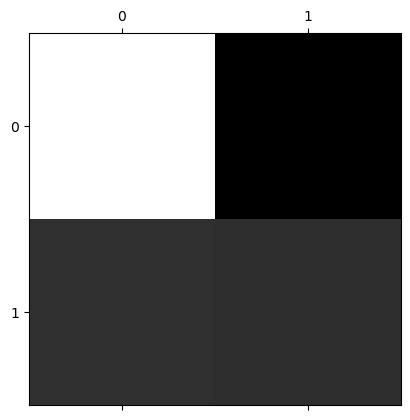

In [36]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [37]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

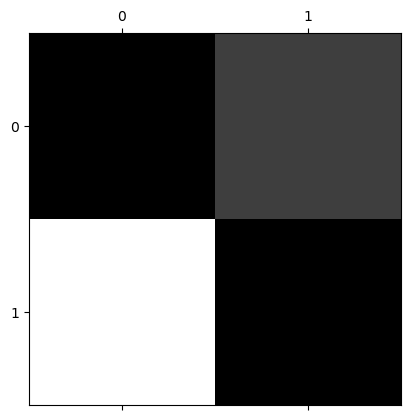

In [38]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [39]:
from sklearn.metrics import f1_score

f1_score(y_train, y_train_pred)

0.5719569237463288

In [40]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train, y_train_pred)

0.6853206711082234

In [41]:
t_test_pred = sgd_clf.predict(X_test)

In [42]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, t_test_pred))

              precision    recall  f1-score   support

           0       0.76      0.90      0.82      2521
           1       0.71      0.45      0.55      1328

    accuracy                           0.75      3849
   macro avg       0.73      0.68      0.69      3849
weighted avg       0.74      0.75      0.73      3849



In [43]:
sgd_clf.score(X_test, y_test)

0.7474668745128605

### RandomForestClassifier

In [44]:
from sklearn.ensemble import RandomForestClassifier

rnd_f_cls = RandomForestClassifier(random_state=random_state)
rnd_f_cls.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [45]:
y_train_pred = cross_val_predict(rnd_f_cls, X_train, y_train, cv=3)

In [46]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred)

array([[9074,  992],
       [3495, 1833]], dtype=int64)

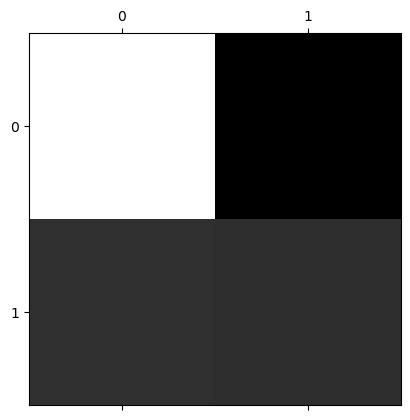

In [47]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [48]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

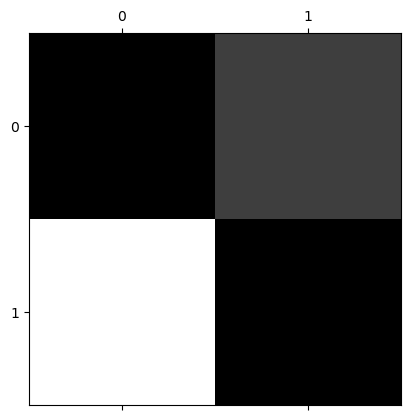

In [49]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [50]:
from sklearn.metrics import f1_score

f1_score(y_train, y_train_pred)

0.4496504354225439

In [51]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train, y_train_pred)

0.6227409793560698

In [52]:
t_test_pred = rnd_f_cls.predict(X_test)
f1_score(y_test, t_test_pred)

0.4452122408687068

In [53]:
print(classification_report(y_test, t_test_pred))

              precision    recall  f1-score   support

           0       0.72      0.90      0.80      2521
           1       0.65      0.34      0.45      1328

    accuracy                           0.71      3849
   macro avg       0.68      0.62      0.62      3849
weighted avg       0.70      0.71      0.68      3849



In [54]:
rnd_f_cls.score(X_test, y_test)

0.7079760976877111